✅ Dataset Loaded: 20640 samples, 8 features.

🚀 Training with batch size: 16


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🚀 Training with batch size: 32

🚀 Training with batch size: 64


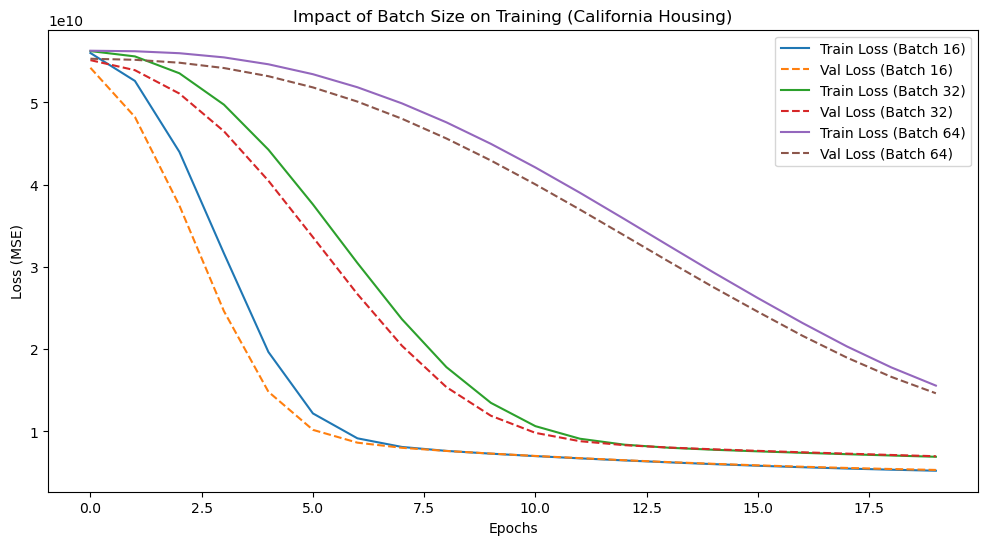

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing


california = fetch_california_housing()
X = california.data 
y = california.target * 100000 

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"✅ Dataset Loaded: {X.shape[0]} samples, {X.shape[1]} features.")

def create_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation="relu", input_shape=(X.shape[1],)),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1) 
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

batch_sizes = [16, 32, 64]
history_dict = {}

for batch_size in batch_sizes:
    print(f"\n🚀 Training with batch size: {batch_size}")
    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    history_dict[batch_size] = history

plt.figure(figsize=(12, 6))
for batch_size, history in history_dict.items():
    plt.plot(history.history["loss"], label=f"Train Loss (Batch {batch_size})")
    plt.plot(history.history["val_loss"], linestyle="dashed", label=f"Val Loss (Batch {batch_size})")

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Impact of Batch Size on Training (California Housing)")
plt.legend()
plt.show()
